In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Get the current notebook's directory
notebook_dir = os.getcwd()

# Append the path to 'intermittentLevy' directory
sys.path.append(os.path.join(notebook_dir, 'intermittentLevy'))

# Import functions from 'functions.py'
from functions import to_optimize_mom22_4_diff_serg_log,safe_log, mom4_serg_log, to_optimize_mom4_serg_log, mom22_4_diff_serg_log, intermittent2,setup_kde, levy_flight_2D_2, form_groups, load_parameters, setup_kde, perform_iterations,perform_estimation


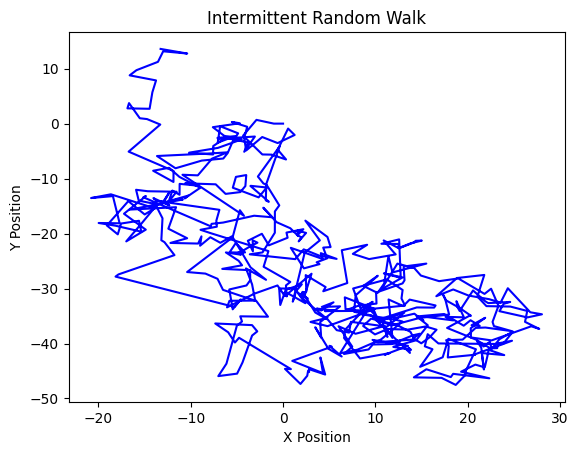

In [2]:
# Generate an intermittent trajectory
x, y = intermittent2(nt=1000, dt=1, mean_bal_sac=1, diffusion=1, rate21=0.5, rate12=0.5)

# Plot intermittent trajectory
plt.plot(x, y,color='blue')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Intermittent Random Walk')
plt.show()

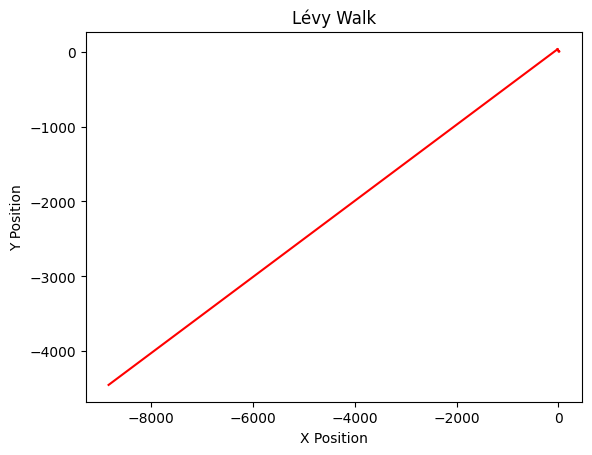

In [3]:

# Generate Lévy flight trajectory
x_measured, y_measured, _ = levy_flight_2D_2(n_redirections=1000, n_max=10000, lalpha=1.5, tmin=1, measuring_dt=1)

# Plot Lévy flight trajectory
plt.plot(x_measured, y_measured,color='red')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Lévy Walk')
plt.show()

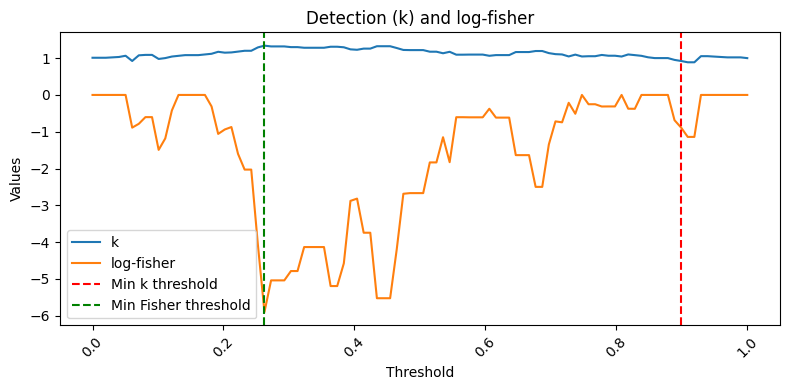

In [4]:
# Define a random vector
vector = np.random.rand(100)
# Define 'threshold_array' with appropriate thresholds
threshold_array = np.linspace(0, 1, 100)
# Define the x-axis format
x_axis_format = "%.2f"
# Process the data and obtain detection values and minimum thresholds
detection, detectionfisher, min_k, min_fisher, _, _, _ = form_groups(vector, threshold_array, x_axis_format)
# Calculate log-k values
log_k = np.log(detection)
# Plot for 'detection' with threshold lines
plt.figure(figsize=(8, 4))
plt.plot(threshold_array, detection, label='k')
plt.plot(threshold_array, detectionfisher, label='log-fisher')
plt.xlabel("Threshold")
plt.title("Detection (k) and log-fisher")
plt.xticks(rotation=45)
plt.ylabel("Values")

# Add vertical lines for minimum thresholds
if min_k is not None:
    plt.axvline(x=min_k, color='r', linestyle='--', label='Min k threshold')
if min_fisher is not None:
    plt.axvline(x=min_fisher, color='g', linestyle='--', label='Min Fisher threshold')
plt.legend()
plt.tight_layout()
plt.show()

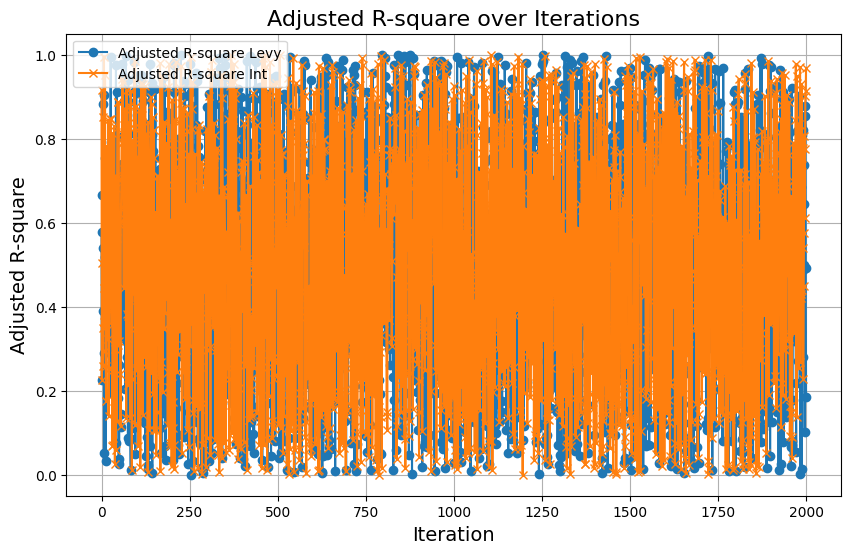

In [5]:

# Load parameters, set up KDE, and define other simulation parameters
normed_loc_params, mean_params, std_params = load_parameters('intermittent_est_params.txt')
kde = setup_kde(normed_loc_params)

N = 10000  # Number of points
N_iter = 2000  # Number of iterations
integration_factor = 1
g_tau = 1
tau_list = np.arange(1, 100)
re_estimations = 5  
opt_iter = 200      
redim_max = 2

# Perform iterations
og_params, lev_params_int, adj_r_square_int_lev, adj_r_square_int_int, est_params, est_params2 = perform_iterations(
    N_iter, N, integration_factor, g_tau, kde, std_params, mean_params, tau_list
)

# Plotting the results of the simulations
plt.figure(figsize=(10, 6))
plt.plot(adj_r_square_int_lev, label='Adjusted R-square Levy', marker='o')
plt.plot(adj_r_square_int_int, label='Adjusted R-square Int', marker='x')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Adjusted R-square', fontsize=14)
plt.title('Adjusted R-square over Iterations', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

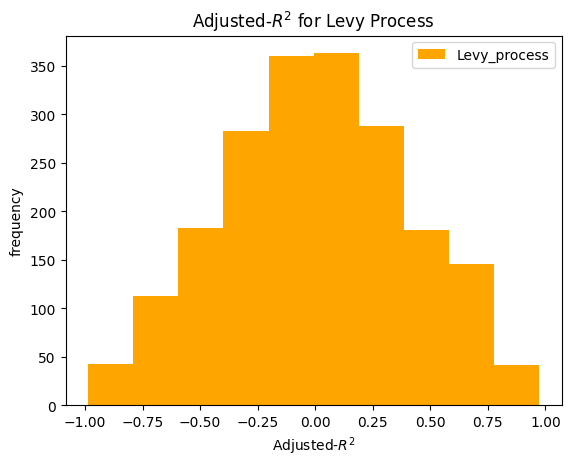

In [6]:
import matplotlib.pyplot as plt

# Calculate the difference between adj_r_square_lev_int and adj_r_square_lev
difference_lev = np.array(adj_r_square_int_int) - np.array(adj_r_square_int_lev)

# Create a histogram plot for the Levy process
plt.hist(difference_lev, bins=10, label='Levy_process', color='orange')  # Adjust color and label as needed
plt.title(r'Adjusted-$R^2$ for Levy Process')
plt.legend()
plt.ylabel('frequency')
plt.xlabel(r'Adjusted-$R^2$')
#plt.savefig('synth_levy_rsquare.png')
plt.show()


In [7]:
loc_params = np.swapaxes(np.loadtxt('intermittent_est_params.txt'),0,1)
mean_params = np.mean(np.log(loc_params),axis=1)
std_params = np.std(np.log(loc_params),axis=1)
normed_loc_params = (np.swapaxes(np.log(loc_params),0,1)-mean_params)/std_params
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(normed_loc_params)
new_data = kde.sample()


In [8]:
# Function to write individual files
def write_to_file(filename, content):
    path = f"{filename}.txt"
    # Open the file for writing
    with open(path, "w") as file:
        # Check if content is a list or similar iterable
        if isinstance(content, (list, tuple, np.ndarray)):
            # Write each item on a new line
            for item in content:
                file.write(f"{item}\n")
        else:
            # If content is not iterable, write it directly
            file.write(str(content))
    return path

# Assign the results to variables
summary_og_params = og_params
summary_levy_params = lev_params_int
summary_adj_r_square_levy = adj_r_square_int_lev
summary_adj_r_square_int = adj_r_square_int_int
summary_est_params = est_params
summary_est_params2 = est_params2

# Writing each parameter to a separate file
file_paths = []
file_paths.append(write_to_file("summary_og_params", summary_og_params))
file_paths.append(write_to_file("summary_levy_params", summary_levy_params))
file_paths.append(write_to_file("summary_adj_r_square_levy", summary_adj_r_square_levy))
file_paths.append(write_to_file("summary_adj_r_square_int", summary_adj_r_square_int))
file_paths.append(write_to_file("summary_est_params", summary_est_params))
file_paths.append(write_to_file("summary_est_params2", summary_est_params2))
file_paths

# Print the summary of results
print("Summary of Results:")
print("OG Params: ", summary_og_params)
print("Levy Params: ", summary_levy_params)
print("Adjusted R-square for Levy Fit: ", summary_adj_r_square_levy)
print("Adjusted R-square for Int Fit: ", summary_adj_r_square_int)
# Add any additional summaries you need

# Plotting
''''import matplotlib.pyplot as plt

plt.plot(summary_adj_r_square_levy, label='Adjusted R-square Levy')
plt.plot(summary_adj_r_square_int, label='Adjusted R-square Int')
plt.xlabel('Iteration')
plt.ylabel('Adjusted R-square')
plt.title('Adjusted R-square over Iterations')
plt.legend()
plt.savefig('r_square_plot.png')
plt.show()'''


Summary of Results:
OG Params:  [[13.833506006616679, 0.09556889921393505, 0.058364738594065345, 0.0015623634677410692], [8.777031091774672, 0.06627142307400406, 0.12536563725729444, 0.00825916814202288], [80.74626362695099, 0.3432286145126785, 0.12355949521148937, 8.074838833675692e-05], [64.85051010575384, 0.1566497298168685, 0.45009688568395667, 0.001527918363240751], [149.60819539895482, 0.674917085283319, 0.7758599022696184, 0.002550516087193958], [16.93896256283499, 0.07116114109230233, 0.11028819048769671, 0.0014733391987043257], [9.554142655717804, 0.0692314957172757, 0.15658354526211052, 0.008106385350436694], [431.66957160418866, 0.8716850122922162, 1.214454710508708, 0.0011531577834496625], [11.629729599167213, 0.04150108496087518, 0.0854578302220502, 0.0031764733748086086], [34.15977236961402, 1.0019670494109765, 0.11339666364785424, 0.0006354881660233674], [10.116331993413512, 0.06432598850461604, 0.06386948757879465, 0.0015142802821703025], [18.37853615757715, 0.096992245

"'import matplotlib.pyplot as plt\n\nplt.plot(summary_adj_r_square_levy, label='Adjusted R-square Levy')\nplt.plot(summary_adj_r_square_int, label='Adjusted R-square Int')\nplt.xlabel('Iteration')\nplt.ylabel('Adjusted R-square')\nplt.title('Adjusted R-square over Iterations')\nplt.legend()\nplt.savefig('r_square_plot.png')\nplt.show()"

In [9]:
import numpy as np
import scipy.optimize
from functions import mom22_4_diff_serg_log
from functions import to_optimize_mom4_serg_log
from functions import mom4_serg_log
from scipy.optimize import dual_annealing
from scipy.stats import linregress
import matplotlib.pyplot as plt

def safe_log(x, min_val=1e-10, max_val=1e30):
    """ Compute logarithm, replacing non-positive or extremely large values """
    x_safe = np.clip(x, min_val, max_val)
    return np.log(x_safe)


# Assuming you have loaded the data and other variables here...
def mom4_serg_log(t, v0, D, lambdaB, lambdaD):
    """
        Calculate the logarithm of the fourth moment of a stochastic process.

        Parameters:
        t (float): Time parameter.
        v0 (float): Initial velocity.
        D (float): Diffusion coefficient.
        lambdaB (float): Rate parameter B.
        lambdaD (float): Rate parameter D.

        Returns:
        float: Logarithm of the fourth moment.
        """
    C1 = 3 * lambdaB ** (-2) * (lambdaB + lambdaD) ** (-2) * (2 * D * lambdaB ** 2 + v0 ** 2 * lambdaD) ** 2
    C2 = 3 * lambdaB ** (-3) * lambdaD * (lambdaB + lambdaD) ** (-3) * (
            8 * D ** 2 * lambdaB ** 4 - 8 * D * v0 ** 2 * lambdaB ** 2 * (2 * lambdaB + lambdaD) + v0 ** 4 * (
            3 * lambdaB ** 2 - 2 * lambdaB * lambdaD - 3 * lambdaD ** 2))
    C3 = 3 * lambdaB ** (-4) * lambdaD * (lambdaB + lambdaD) ** (-4) * (
            -8 * D ** 2 * lambdaB ** 5 + 8 * D * v0 ** 2 * lambdaB ** 2 * (
            3 * lambdaB ** 2 + 3 * lambdaB * lambdaD + lambdaD ** 2) + v0 ** 4 * (
                    -9 * lambdaB ** 3 - 7 * lambdaB ** 2 * lambdaD + 3 * lambdaB * lambdaD ** 2 + 3 * lambdaD ** 3))
    C4 = 3 / 2 * v0 ** 4 * lambdaB ** (-2) * lambdaD * (lambdaB + lambdaD) ** (-1)
    C5 = 6 * v0 ** 4 * lambdaB ** (-2) * (lambdaB + lambdaD) ** (-1)
    C6 = 0.0
    C7 = -3 * v0 ** 2 / (lambdaB ** (4) * lambdaD * (lambdaB + lambdaD)) * (8 * D * lambdaB ** 2 * lambdaD + v0 ** 2 * (
            2 * lambdaB ** 2 - 6 * lambdaB * lambdaD + 3 * lambdaD ** 2))
    C8 = 6 * lambdaB / (lambdaD * (lambdaB + lambdaD) ** (4)) * (v0 ** 2 + 2 * D * lambdaD) ** 2
    # Calculate the expression
    expr = (C1 * t ** 2 + C2 * t + C3 + 
            C4 * t ** 2 * np.exp(-lambdaB * t) + 
            C5 * t * np.exp(-lambdaB * t) + 
            C6 * t * np.exp(-(lambdaB + lambdaD) * t) + 
            C7 * np.exp(-lambdaB * t) + 
            C8 * np.exp(-(lambdaB + lambdaD) * t))

    # Debugging: Print values that are about to be logged
    #print("Debug: expr values before log:", expr)

    expr_safe = np.maximum(expr, 1e-10)

    # Debugging: Print values after ensuring positivity
    #print("Debug: expr_safe values after ensuring positivity:", expr_safe)

    return np.log(expr_safe)
    

def to_optimize_mom4_serg_log(params):
    try:
        model_result = mom4_serg_log(tau_list, *params)
        return np.sum(np.abs(dx4_log - safe_log(model_result)))
    except Exception as e:
        #print("Error encountered:", e)
        return 1e10

def to_optimize_mom22_4_diff_serg_log(params):
    try:
        model_result = mom22_4_diff_serg_log(tau_list, *params)
        return np.sum(np.abs(difference - safe_log(model_result)))
    except Exception as e:
        #print("Error encountered:", e)
        return 1e10


# Define the parameters for synthetic data
g_v0 = 5.0
g_D = 1.0
g_lambda_B = 0.05
lambda_B = 0.05
g_lambda_D = 0.005

factor1 = 1
factor2 = 1
factor3 = 1
factor4 = 1

# Compute synthetic data
tau_list = np.arange(1, 60)
dx4_log = np.log(np.random.rand(len(tau_list)))  
    
x_loc,y_loc = intermittent2(N*integration_factor,g_tau/integration_factor,g_v0*factor1,g_D*factor2,g_lambda_B*factor3,g_lambda_D*factor4)
    

# Initialize the lists
x_list, y_list, dx_list, dy_list = [], [], [], []
dx4, dy4, dx2, dy2 = [], [], [], []

# Assuming tau_list, x_loc, y_loc, and integration_factor are already defined
for i in tau_list:
    x_list.append(x_loc[::i * integration_factor])
    y_list.append(y_loc[::i * integration_factor])
    dx_list.append(np.diff(x_loc[::i * integration_factor]))
    dy_list.append(np.diff(y_loc[::i * integration_factor]))

    dx4.append(np.mean(np.array(dx_list[-1])**4))
    dy4.append(np.mean(np.array(dy_list[-1])**4))
    dx2.append(np.mean(np.array(dx_list[-1])**2))
    dy2.append(np.mean(np.array(dy_list[-1])**2))

# Convert to NumPy arrays and compute logarithms
dx4, dy4 = np.array(dx4), np.array(dy4)
dx4_log, dy4_log = np.log(dx4), np.log(dy4)

dx2, dy2 = np.array(dx2), np.array(dy2)
dx2_log, dy2_log = np.log(dx2), np.log(dy2)

# Initial guess for fitting parameters
initial_guess = [g_v0 * factor1, g_D * factor2, g_lambda_B * factor3, g_lambda_D * factor4]

# Perform fitting using dual annealing
result = dual_annealing(to_optimize_mom4_serg_log, [(1e-6, 1e6)] * 4, x0=initial_guess)
popt_x = result.x
print("popt_x:", popt_x)
# Calculate the difference
difference = np.array(dx4_log) - 2 * np.array(dx2_log)

result_diff = dual_annealing(to_optimize_mom22_4_diff_serg_log, [(1e-6, 1e3)] * 4, x0=initial_guess)
popt_x_diff = result_diff.x


popt_x: [9.99970522e+05 1.21200126e+05 2.72444325e-04 3.60425036e+05]


In [10]:
bounds = [(0.001, 10.0),   # Adjust the lower and upper bounds for v0
          (0.001, 10.0),   # Adjust the bounds for D
          (0.001, 1.0),    # Adjust the bounds for lambdaB
          (0.001, 1.0)]    # Adjust the bounds for lambdaD

# Initial guess for fitting parameters
initial_guess = [5.0, 1.0, 0.05, 0.005]  # Adjust these values as needed

# Perform fitting using dual annealing with custom bounds
result = dual_annealing(to_optimize_mom4_serg_log, bounds, x0=initial_guess, maxiter=1000)

# Extract the optimized parameters
popt_x = result.x

# Print the optimized parameters
print("Optimized Parameters (popt_x):", popt_x)

Optimized Parameters (popt_x): [9.99998741e+00 9.91442608e-01 1.00000000e-03 1.00000000e+00]


In [11]:
popt_x_diff, pcov_x = scipy.optimize.curve_fit(mom22_4_diff_serg_log, np.array(tau_list), (np.array(dx4_log) - 2*np.array(dx2_log)),p0 = popt_x ,bounds=(0.0001, [np.inf, np.inf, np.inf,np.inf]),maxfev=500000)
popt_x_diff2, pcov_x = scipy.optimize.curve_fit(mom22_4_diff_serg_log, np.array(tau_list), (np.array(dx4_log) - 2*np.array(dx2_log)),p0 = [g_v0*factor1,g_D*factor2,g_lambda_B*factor3,g_lambda_D*factor4] ,bounds=(0.0001, [np.inf, np.inf, np.inf,np.inf]),maxfev=500000)
popt_x_diff2
adj_r_square_int_int
g_int_fit = mom22_4_diff_serg_log(np.array(tau_list),popt_x_diff2[0],popt_x_diff2[1],popt_x_diff2[2],popt_x_diff2[3])

#dx2_log = np.log(np.random.rand(len(tau_list))) 
# Calculate the difference
difference = np.array(dx4_log) - 2 * np.array(dx2_log)

In [13]:
mom22_4_diff_serg_log(1,g_v0*factor1,g_D*factor2,g_lambda_B*factor3,g_lambda_D*factor4)

1.3017199547781475

In [14]:
adj_r_square_int_lev

[0.5776941472414618,
 0.22534288603607022,
 0.6658552463579839,
 0.8820837616310712,
 0.39104887695499824,
 0.5406081555723672,
 0.9031804447942682,
 0.051255246624345996,
 0.29034940969323186,
 0.5178535898908909,
 0.7535740509589394,
 0.5858659390286869,
 0.033566316098862736,
 0.3373055412616208,
 0.3059497153401388,
 0.31795547110560185,
 0.4696197971941233,
 0.6319070987285466,
 0.5405340796731399,
 0.6839056415449702,
 0.7485492839738043,
 0.5613472554426415,
 0.36533188832982477,
 0.4630593865153366,
 0.7033250544011556,
 0.1950612551267149,
 0.9941579097777998,
 0.32678473040975553,
 0.7918978072270243,
 0.281142564233683,
 0.2710875858361672,
 0.6613339096571281,
 0.4941157329978637,
 0.6417259772509909,
 0.6584438658131738,
 0.49276420772641316,
 0.3753554725433478,
 0.5804915950437358,
 0.6272471586780816,
 0.47285478965803995,
 0.07643219446946292,
 0.9746015128363202,
 0.19596747058425834,
 0.9116275059282152,
 0.13349324339679713,
 0.24082251424775458,
 0.7365888914758869

In [15]:
popt_x_diff, pcov_x = scipy.optimize.curve_fit(mom22_4_diff_serg_log, np.array(tau_list), (np.array(dx4_log) - 2*np.array(dx2_log)),p0 = popt_x ,bounds=(0.0001, [np.inf, np.inf, np.inf,np.inf]),maxfev=500000)
popt_x_diff2, pcov_x = scipy.optimize.curve_fit(mom22_4_diff_serg_log, np.array(tau_list), (np.array(dx4_log) - 2*np.array(dx2_log)),p0 = [g_v0*factor1,g_D*factor2,g_lambda_B*factor3,g_lambda_D*factor4] ,bounds=(0.0001, [np.inf, np.inf, np.inf,np.inf]),maxfev=500000)
popt_x_diff2

array([4.53794882e+00, 8.26463863e-01, 2.26351568e-02, 2.13027104e-03])

In [16]:
adj_r_square_int_int

[0.9158901246725225,
 0.22586864484789393,
 0.5044905497388771,
 0.2592654844563159,
 0.8515605491186736,
 0.35048167196493074,
 0.36342830091932843,
 0.994932373345425,
 0.4443456726847189,
 0.6315830239473119,
 0.9508858129675686,
 0.29487711305797215,
 0.2590769208212135,
 0.17552917481037777,
 0.7826076845616323,
 0.6971028174958209,
 0.5486623339387188,
 0.7581028151660663,
 0.32316785498755496,
 0.8445046839867305,
 0.1399638654431331,
 0.25248413665512826,
 0.390080604176808,
 0.5039445728666688,
 0.8471050967339394,
 0.7248424080213837,
 0.8467136020773419,
 0.6300536343335121,
 0.609667395600615,
 0.3570351496551111,
 0.8130551833380986,
 0.06753291182874666,
 0.24896075183996236,
 0.07051526764269578,
 0.5243841277557674,
 0.4776930965980566,
 0.8296073818596433,
 0.300032030905792,
 0.026891341925895484,
 0.7114760892538338,
 0.7108706445028762,
 0.06005422971467622,
 0.6822297076061973,
 0.1292829561706078,
 0.5644780782631869,
 0.7074879296354136,
 0.8878169533286963,
 0.3

In [17]:
g_int_fit = mom22_4_diff_serg_log(np.array(tau_list),popt_x_diff2[0],popt_x_diff2[1],popt_x_diff2[2],popt_x_diff2[3])
v_range = np.power(2,np.arange(4,4)).astype(int)
D_range = [0.1,1,10]

In [18]:
N = 60000
d_max = max((dx2 + dy2)**0.5)
vmax = d_max / g_tau
Dmax = d_max / (g_tau**0.5)
lambda_min = 3 / (N*g_tau)
lambda_max = 6 / g_tau
grid_nodes = 4
lambda_min_log2 = np.log2(lambda_min)
lambda_max_log2 = np.log2(lambda_max)
lambda_increase = (lambda_max_log2-lambda_min_log2)/grid_nodes


gl_v_vec = vmax * np.power(2.0,np.arange(-5,4))
gl_d_vec = Dmax * np.power(2.0,np.arange(-7,1))

gl_lambdaB_vec = np.power(2.0,np.arange(lambda_min_log2,lambda_max_log2+lambda_increase,lambda_increase))
gl_lambdaD_vec = np.power(2.0,np.arange(lambda_min_log2,lambda_max_log2+lambda_increase,lambda_increase))

param_grid = np.array(np.meshgrid(gl_v_vec,gl_d_vec,gl_lambdaB_vec,gl_lambdaD_vec)).T.reshape(-1,4)

In [19]:
lambda_max 
gl_lambdaB_vec
len(param_grid)

1800

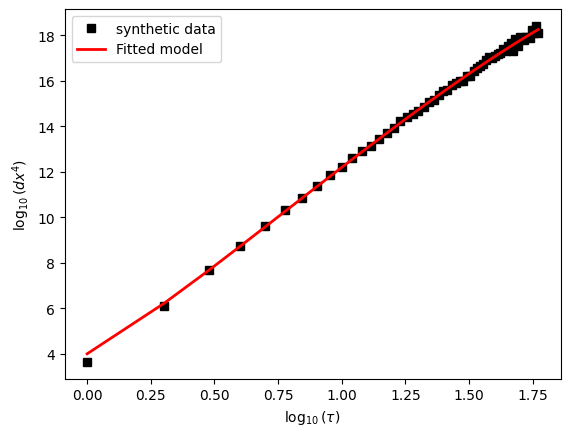

In [21]:
from scipy.optimize import curve_fit

# Define the model function for curve_fit
def model_func(tau, v0, D, lambdaB, lambdaD):
    return mom4_serg_log(tau, v0, D, lambdaB, lambdaD)

# Perform the curve fitting
popt, pcov = curve_fit(model_func, tau_list, dx4_log, p0=initial_guess)

# Plot the synthetic data
plt.plot(np.log10(tau_list), dx4_log, 'ks', alpha=1, label='synthetic data')

# Plot the fitted model
plt.plot(np.log10(tau_list), model_func(np.array(tau_list), *popt), label='Fitted model', c='red', linewidth=2)

# Add labels and legend
plt.xlabel(r'$\log_{10}(\tau)$')
plt.ylabel(r'$\log_{10}(dx^4)$')
plt.legend()

# Display the plot
plt.show()


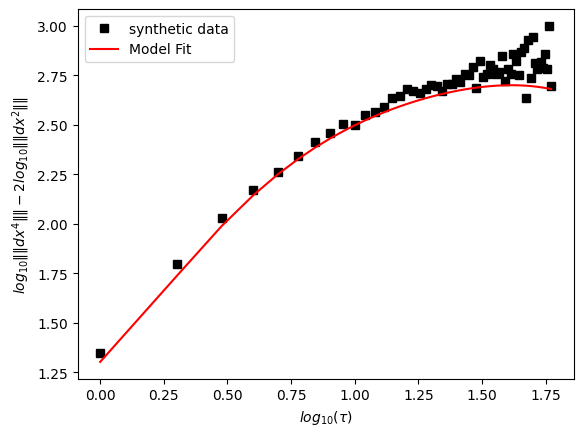

In [22]:
from functions import mom22_4_diff_serg_log
plt.plot(np.log10(tau_list), difference, 'ks', alpha=1, label='synthetic data')
plt.plot(np.log10(tau_list), mom22_4_diff_serg_log(np.array(tau_list), g_v0 * factor1, g_D * factor2, g_lambda_B * factor3, g_lambda_D * factor4), label='Model Fit', c='red')
plt.xlabel(r'$log_{10}(\tau)$')
plt.ylabel(r'$log_{10} \|\|dx^4\|\| - 2log_{10} \|\|dx^2\|\| $')
plt.legend()
plt.show()



File paths of the written summaries: ['summary_og_params.txt', 'summary_levy_params.txt', 'summary_adj_r_square_levy.txt', 'summary_adj_r_square_int.txt', 'summary_est_params.txt', 'summary_est_params2.txt']


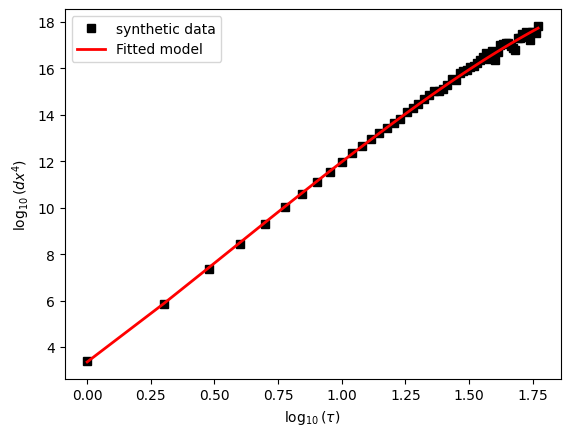

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.optimize import curve_fit, dual_annealing

# Import custom functions from a specific directory
from functions import intermittent2, load_parameters, setup_kde, perform_iterations

# Append the path to 'intermittentLevy' directory
sys.path.append(os.path.join(os.path.dirname(notebook_dir), 'intermittentLevy'))

# Load parameters and set up KDE
normed_loc_params, mean_params, std_params = load_parameters('intermittent_est_params.txt')
kde = setup_kde(normed_loc_params)

# Simulation parameters
N = 10000
N_iter = 2000
integration_factor = 1
g_tau = 1
tau_list = np.arange(1, 60)  # Adjust to ensure compatibility with data generation

# Perform iterations
og_params, lev_params_int, adj_r_square_int_lev, adj_r_square_int_int, est_params, est_params2 = perform_iterations(
    N_iter, N, integration_factor, g_tau, kde, std_params, mean_params, tau_list
)

# Function to write data to a text file
def write_to_file(filename, content):
    path = f"{filename}.txt"
    with open(path, "w") as file:
        for item in np.atleast_1d(content):
            file.write(f"{item}\n")
    return path

# Write summary results to files
file_paths = [
    write_to_file("summary_og_params", og_params),
    write_to_file("summary_levy_params", lev_params_int),
    write_to_file("summary_adj_r_square_levy", adj_r_square_int_lev),
    write_to_file("summary_adj_r_square_int", adj_r_square_int_int),
    write_to_file("summary_est_params", est_params),
    write_to_file("summary_est_params2", est_params2)
]

# Print the paths of the written files
print("File paths of the written summaries:", file_paths)

# Define a safe logarithm function
def safe_log(x, min_val=1e-10, max_val=1e30):
    return np.log(np.clip(x, min_val, max_val))

def mom4_serg_log(t, v0, D, lambdaB, lambdaD):
    """
        Calculate the logarithm of the fourth moment of a stochastic process.

        Parameters:
        t (float): Time parameter.
        v0 (float): Initial velocity.
        D (float): Diffusion coefficient.
        lambdaB (float): Rate parameter B.
        lambdaD (float): Rate parameter D.

        Returns:
        float: Logarithm of the fourth moment.
        """
    C1 = 3 * lambdaB ** (-2) * (lambdaB + lambdaD) ** (-2) * (2 * D * lambdaB ** 2 + v0 ** 2 * lambdaD) ** 2
    C2 = 3 * lambdaB ** (-3) * lambdaD * (lambdaB + lambdaD) ** (-3) * (
            8 * D ** 2 * lambdaB ** 4 - 8 * D * v0 ** 2 * lambdaB ** 2 * (2 * lambdaB + lambdaD) + v0 ** 4 * (
            3 * lambdaB ** 2 - 2 * lambdaB * lambdaD - 3 * lambdaD ** 2))
    C3 = 3 * lambdaB ** (-4) * lambdaD * (lambdaB + lambdaD) ** (-4) * (
            -8 * D ** 2 * lambdaB ** 5 + 8 * D * v0 ** 2 * lambdaB ** 2 * (
            3 * lambdaB ** 2 + 3 * lambdaB * lambdaD + lambdaD ** 2) + v0 ** 4 * (
                    -9 * lambdaB ** 3 - 7 * lambdaB ** 2 * lambdaD + 3 * lambdaB * lambdaD ** 2 + 3 * lambdaD ** 3))
    C4 = 3 / 2 * v0 ** 4 * lambdaB ** (-2) * lambdaD * (lambdaB + lambdaD) ** (-1)
    C5 = 6 * v0 ** 4 * lambdaB ** (-2) * (lambdaB + lambdaD) ** (-1)
    C6 = 0.0
    C7 = -3 * v0 ** 2 / (lambdaB ** (4) * lambdaD * (lambdaB + lambdaD)) * (8 * D * lambdaB ** 2 * lambdaD + v0 ** 2 * (
            2 * lambdaB ** 2 - 6 * lambdaB * lambdaD + 3 * lambdaD ** 2))
    C8 = 6 * lambdaB / (lambdaD * (lambdaB + lambdaD) ** (4)) * (v0 ** 2 + 2 * D * lambdaD) ** 2
    # Calculate the expression
    expr = (C1 * t ** 2 + C2 * t + C3 + 
            C4 * t ** 2 * np.exp(-lambdaB * t) + 
            C5 * t * np.exp(-lambdaB * t) + 
            C6 * t * np.exp(-(lambdaB + lambdaD) * t) + 
            C7 * np.exp(-lambdaB * t) + 
            C8 * np.exp(-(lambdaB + lambdaD) * t))

    # Debugging: Print values that are about to be logged
    #print("Debug: expr values before log:", expr)

    expr_safe = np.maximum(expr, 1e-10)

    # Debugging: Print values after ensuring positivity
    #print("Debug: expr_safe values after ensuring positivity:", expr_safe)

    return np.log(expr_safe)
    

def to_optimize_mom4_serg_log(params):
    try:
        model_result = mom4_serg_log(tau_list, *params)
        return np.sum(np.abs(dx4_log - safe_log(model_result)))
    except Exception as e:
        #print("Error encountered:", e)
        return 1e10

def to_optimize_mom22_4_diff_serg_log(params):
    try:
        model_result = mom22_4_diff_serg_log(tau_list, *params)
        return np.sum(np.abs(difference - safe_log(model_result)))
    except Exception as e:
        #print("Error encountered:", e)
        return 1e10
# Generate synthetic data for dx4_log based on tau_list
# Using the intermittent2 function and the procedure from your original script
g_v0, g_D, g_lambda_B, g_lambda_D = 5.0, 1.0, 0.05, 0.005
factor1, factor2, factor3, factor4 = 1, 1, 1, 1
x_loc, y_loc = intermittent2(N * integration_factor, g_tau / integration_factor, g_v0 * factor1, g_D * factor2, g_lambda_B * factor3, g_lambda_D * factor4)

dx_list = [np.diff(x_loc[::i * integration_factor]) for i in tau_list]
dx4 = [np.mean(dx**4) for dx in dx_list]
dx4_log = np.log(dx4)

# Define the model function for curve_fit
def model_func(tau, v0, D, lambdaB, lambdaD):
    return mom4_serg_log(tau, v0, D, lambdaB, lambdaD)

# Perform the curve fitting
initial_guess = [g_v0, g_D, g_lambda_B, g_lambda_D]
popt, pcov = curve_fit(model_func, tau_list, dx4_log, p0=initial_guess)

# Plot the synthetic data and the fitted model
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# First subplot
axs[0].plot(np.log10(tau_list), dx4_log, 'ks', alpha=1, label='synthetic data')
axs[0].plot(np.log10(tau_list), model_func(np.array(tau_list), *popt), label='Fitted model', c='red', linewidth=2)
axs[0].set_xlabel(r'$\log_{10}(\tau)$')
axs[0].set_ylabel(r'$\log_{10}(dx^4)$')
axs[0].legend()
axs[0].set_title('Synthetic Data and Fitted Model')

# Second subplot
axs[1].plot(np.log10(tau_list), difference, 'ks', alpha=1, label='synthetic data')
axs[1].plot(np.log10(tau_list), mom22_4_diff_serg_log(np.array(tau_list), g_v0 * factor1, g_D * factor2, g_lambda_B * factor3, g_lambda_D * factor4), label='Model Fit', c='red')
axs[1].set_xlabel(r'$\log_{10}(\tau)$')
axs[1].set_ylabel(r'$\log_{10} \|dx^4\| - 2\log_{10} \|dx^2\|$')
axs[1].legend()
axs[1].set_title('Model Fit Comparison')

plt.tight_layout()
plt.show()